# Fire-Proof Tumblers

---

## Combining & Cleaning CSV and Reviews

In [1]:
# Dependencies and Set Up
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

### Google Trends Between Stanley, Yeti & Hydroflask

In [2]:
# Load CSV file into Pandas DataFrame
time_df = pd.read_csv("../Resources/multiTimeline_clean.csv")

# Display sample data
time_df.head()

,Week,yeti tumbler: (United States),stanley tumbler: (United States),hydroflask: (United States)
0,2019-09-15,6,0,38
1,2019-09-22,6,0,36
2,2019-09-29,6,0,33
3,2019-10-06,6,0,32
4,2019-10-13,6,0,28


In [3]:
# Convert str(week) to datetime value
time_df['Week'] = pd.to_datetime(time_df['Week'])

# Extracting year for graphing purposes
time_df['Year'] = time_df['Week'].dt.year

# Extracting month for graphing purposes
time_df['Month'] = time_df['Week'].dt.month

# Combining month and year for graphing purposes
time_df['Month_Year'] = time_df['Year'].astype(str) + '-' + time_df['Month'].astype(str).str.zfill(2)
time_df['Month_Year'] = pd.to_datetime(time_df['Month_Year'], format='%Y-%m').dt.to_period('M')
time_df

,Week,yeti tumbler: (United States),stanley tumbler: (United States),hydroflask: (United States),Year,Month,Month_Year
0,2019-09-15,6,0,38,2019,9,2019-09
1,2019-09-22,6,0,36,2019,9,2019-09
2,2019-09-29,6,0,33,2019,9,2019-09
3,2019-10-06,6,0,32,2019,10,2019-10
4,2019-10-13,6,0,28,2019,10,2019-10
...,...,...,...,...,...,...,...
257,2024-08-18,6,10,18,2024,8,2024-08
258,2024-08-25,6,10,17,2024,8,2024-08
259,2024-09-01,6,10,16,2024,9,2024-09
260,2024-09-08,6,9,14,2024,9,2024-09


In [4]:
# Replace <1 amounts in Stanley row
time_df = time_df.replace('<1', 0)

In [5]:
# Calculate the average number of searches for Yeti over the 5 years
time_df["yeti tumbler: (United States)"].mean()

7.530534351145038

In [6]:
# Calculate the average number of searches for Stanley over the 5 years
time_df["stanley tumbler: (United States)"] = time_df["stanley tumbler: (United States)"].astype(int)
time_df["stanley tumbler: (United States)"].mean()

9.797709923664122

In [7]:
# Calculate the average number of searches for Hydroflask over the 5 years
time_df["hydroflask: (United States)"].mean()

17.30534351145038

In [8]:
# Filter rows for data after viral video
start_date = '2023-10-15'
end_date = '2024-09-15'
viral_time_df = time_df[(time_df['Week'] >= start_date) & (time_df['Week'] <= end_date)]
viral_time_df.head()

,Week,yeti tumbler: (United States),stanley tumbler: (United States),hydroflask: (United States),Year,Month,Month_Year
213,2023-10-15,6,13,16,2023,10,2023-10
214,2023-10-22,6,16,14,2023,10,2023-10
215,2023-10-29,5,15,14,2023,10,2023-10
216,2023-11-05,7,19,16,2023,11,2023-11
217,2023-11-12,8,27,18,2023,11,2023-11


In [9]:
# Calculate the average number of searches for Yeti since the viral video
viral_time_df["yeti tumbler: (United States)"].mean()

7.612244897959184

In [10]:
# Calculate the average number of searches for Stanley since the viral video
viral_time_df["stanley tumbler: (United States)"].mean()

24.367346938775512

In [11]:
# Calculate the average number of searches for Hydroflask over the 5 years since the viral video
viral_time_df["hydroflask: (United States)"].mean()

17.571428571428573

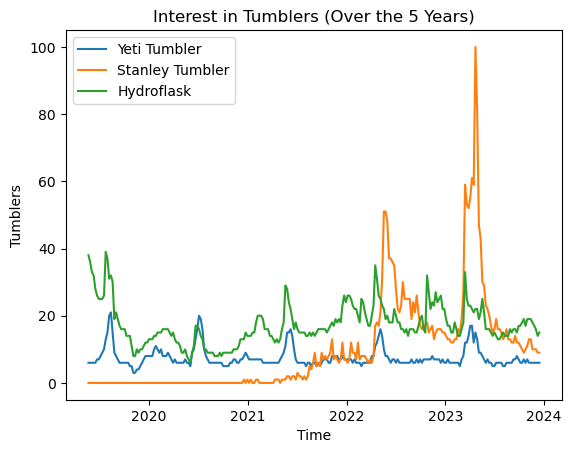

In [12]:
# Use MaxNLocator to limit # of ticks
plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=6))

# Line graph on Yeti over the 5 years
plt.plot(time_df['Week'], time_df["yeti tumbler: (United States)"], label='Yeti Tumbler')
plt.plot(time_df['Week'], time_df["stanley tumbler: (United States)"], label='Stanley Tumbler')
plt.plot(time_df['Week'], time_df["hydroflask: (United States)"], label="Hydroflask")
plt.title("Interest in Tumblers (Over the 5 Years)")
plt.xlabel("Time")
plt.ylabel("Tumblers")
plt.legend()
plt.savefig("../Images/yeti_interest_5yrs.png")
plt.show()

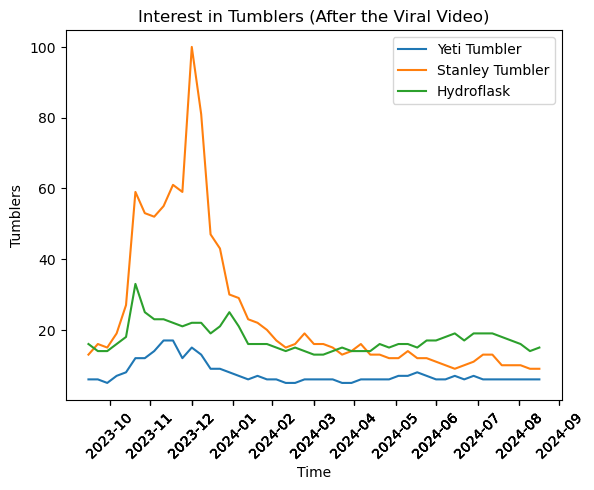

In [13]:
# Use MaxNLocator to limit # of ticks
plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=6))

# Line graph on Yeti after the viral video
plt.plot(viral_time_df['Week'], viral_time_df["yeti tumbler: (United States)"], label='Yeti Tumbler')
plt.plot(viral_time_df['Week'], viral_time_df["stanley tumbler: (United States)"], label='Stanley Tumbler')
plt.plot(viral_time_df['Week'], viral_time_df["hydroflask: (United States)"], label="Hydroflask")
plt.title("Interest in Tumblers (After the Viral Video)")
plt.xlabel("Time")
plt.ylabel("Tumblers")
plt.xticks(ticks=viral_time_df['Month_Year'], labels=viral_time_df['Month_Year'], rotation=45)
plt.legend()
plt.savefig("../Images/yeti_interest_viral.png")
plt.show()

In [14]:
# Load CSV file into Pandas DataFrame
map_df = pd.read_csv("../Resources/geoMap_clean.csv")

# Display sample data
map_df.head()

,Region,yeti tumbler: (9/17/19 - 9/17/24),stanley tumbler: (9/17/19 - 9/17/24),hydroflask: (9/17/19 - 9/17/24)
0,New Hampshire,26%,23%,51%
1,Maine,29%,25%,46%
2,Pennsylvania,28%,29%,43%
3,Michigan,30%,31%,39%
4,Wisconsin,28%,26%,46%


In [15]:
# Converting str to number value
map_df['yeti tumbler: (9/17/19 - 9/17/24)'] = map_df['yeti tumbler: (9/17/19 - 9/17/24)'].str.strip('%').astype(float)
map_df['stanley tumbler: (9/17/19 - 9/17/24)'] = map_df['stanley tumbler: (9/17/19 - 9/17/24)'].str.strip('%').astype(float)
map_df['hydroflask: (9/17/19 - 9/17/24)'] = map_df['hydroflask: (9/17/19 - 9/17/24)'].str.strip('%').astype(float)
map_df.head()

,Region,yeti tumbler: (9/17/19 - 9/17/24),stanley tumbler: (9/17/19 - 9/17/24),hydroflask: (9/17/19 - 9/17/24)
0,New Hampshire,26.0,23.0,51.0
1,Maine,29.0,25.0,46.0
2,Pennsylvania,28.0,29.0,43.0
3,Michigan,30.0,31.0,39.0
4,Wisconsin,28.0,26.0,46.0


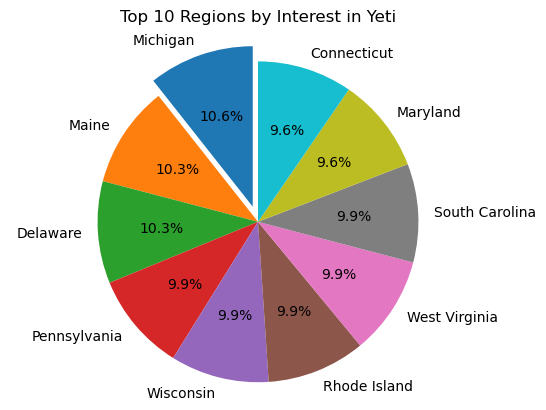

In [16]:
# Create a bar chart to show interest on Yeti tumblers based on Top 10 region
top_10_yeti = map_df.sort_values(by='yeti tumbler: (9/17/19 - 9/17/24)', ascending=False).head(10)
max_index = top_10_yeti['yeti tumbler: (9/17/19 - 9/17/24)'].idxmax()
explode = [0.1 if idx == max_index else 0 for idx in top_10_yeti.index]

plt.pie(top_10_yeti['yeti tumbler: (9/17/19 - 9/17/24)'], 
        labels=top_10_yeti['Region'], 
        autopct='%1.1f%%', 
        startangle=90, 
        explode=explode)
plt.title('Top 10 Regions by Interest in Yeti')
plt.axis('equal')
plt.savefig("../Images/yeti_interest_region.png")
plt.show()

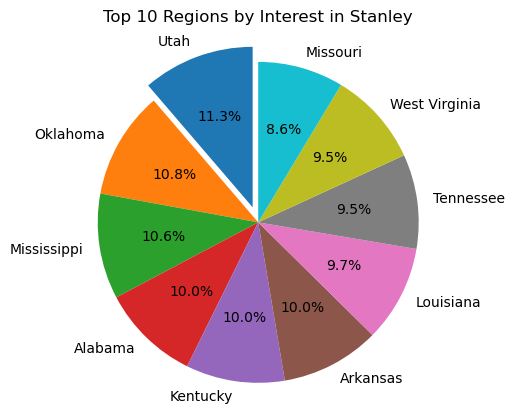

In [17]:
# Create a bar chart to show interest on Stanley tumblers based on Top 10 region
top_10_stanley = map_df.sort_values(by='stanley tumbler: (9/17/19 - 9/17/24)', ascending=False).head(10)
max_index = top_10_stanley['stanley tumbler: (9/17/19 - 9/17/24)'].idxmax()
explode = [0.1 if idx == max_index else 0 for idx in top_10_stanley.index]

plt.pie(top_10_stanley['stanley tumbler: (9/17/19 - 9/17/24)'], 
        labels=top_10_stanley['Region'], 
        autopct='%1.1f%%',
        startangle=90, 
        explode=explode)
plt.title('Top 10 Regions by Interest in Stanley')
plt.axis('equal')
plt.savefig("../Images/stanley_interest_region.png")
plt.show()

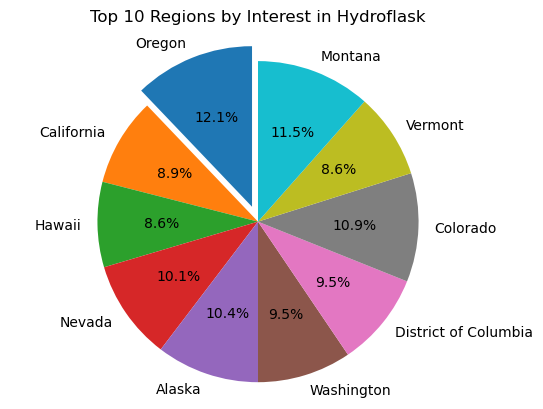

In [18]:
# Create a bar chart to show interest on Hydroflask tumblers based on Top 10 region
top_10_hydroflask = map_df.sort_values(by='hydroflask: (9/17/19 - 9/17/24)', ascending=False).head(10)
max_index = top_10_hydroflask['hydroflask: (9/17/19 - 9/17/24)'].idxmax()
explode = [0.1 if idx == max_index else 0 for idx in top_10_hydroflask.index]

plt.pie(top_10_stanley['hydroflask: (9/17/19 - 9/17/24)'], 
        labels=top_10_hydroflask['Region'], 
        autopct='%1.1f%%',
        startangle=90, 
        explode=explode)
plt.title('Top 10 Regions by Interest in Hydroflask')
plt.axis('equal')
plt.savefig("../Images/hydroflask_interest_region.png")
plt.show()

### Reviews Between Cream, Pink, and Black Stanley Tumblers